# Бинарные переменные и структурные сдвиги

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import re
import scipy.stats as stats

In [30]:
df = pd.read_csv('https://raw.githubusercontent.com/ryupepa/Econometrica/master/python-notebooks/data-csv/sleep75.csv')
df

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32,0,1,0.000000,0.000000,12,0,0,1,3529,...,0,3438,0,3438,0,14,0,13,7.070004,1024
1,31,0,2,0.000000,0.000000,14,9500,1,1,2140,...,0,5020,0,5020,0,11,0,0,1.429999,961
2,44,0,3,0.000000,0.000000,17,42500,1,1,4595,...,1,2815,0,2815,0,21,0,0,20.529997,1936
3,30,0,4,0.000000,0.000000,12,42500,1,1,3211,...,1,3786,0,3786,0,12,0,12,9.619998,900
4,64,0,5,0.000000,0.000000,14,2500,1,1,4052,...,1,2580,0,2580,0,44,0,33,2.750000,4096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,45,0,702,0.182331,0.030075,12,5500,1,0,5069,...,1,2026,0,2026,0,27,0,18,NaN,2025
702,34,0,703,0.182331,0.030075,10,2500,0,0,5885,...,0,675,1,465,210,18,0,4,NaN,1156
703,37,0,704,0.182331,0.030075,12,3500,1,0,4719,...,1,1851,0,1851,0,19,0,17,NaN,1369
704,54,0,705,0.182331,0.030075,17,32500,1,0,5149,...,1,1961,1,1481,480,31,0,22,NaN,2916


## 1.1

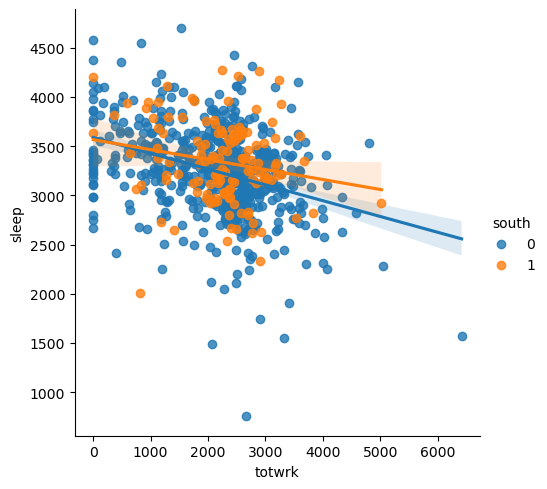

In [35]:
sns.lmplot(x='totwrk', y='sleep', data=df, hue='south')
plt.show(sns)

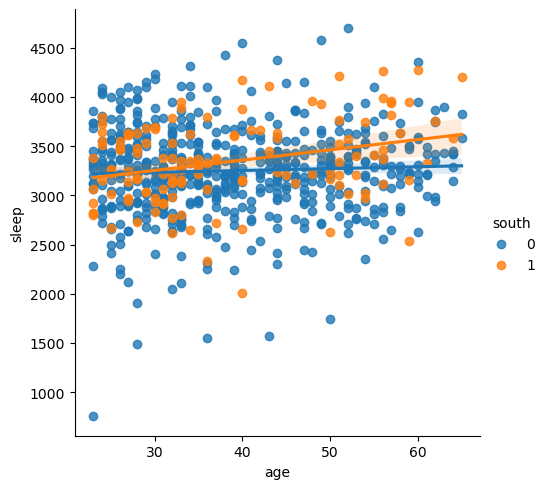

In [36]:
sns.lmplot(x='age', y='sleep', data=df, hue='south')
plt.show(sns)

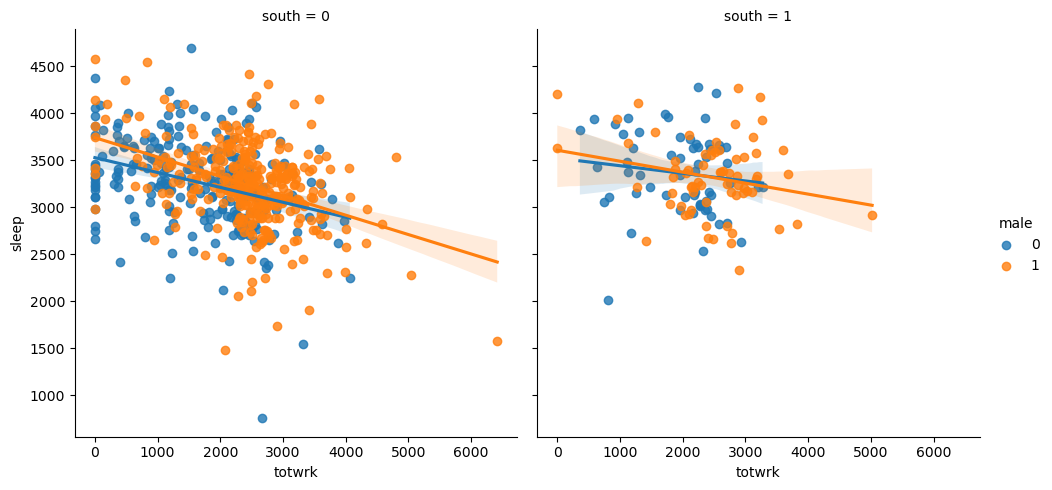

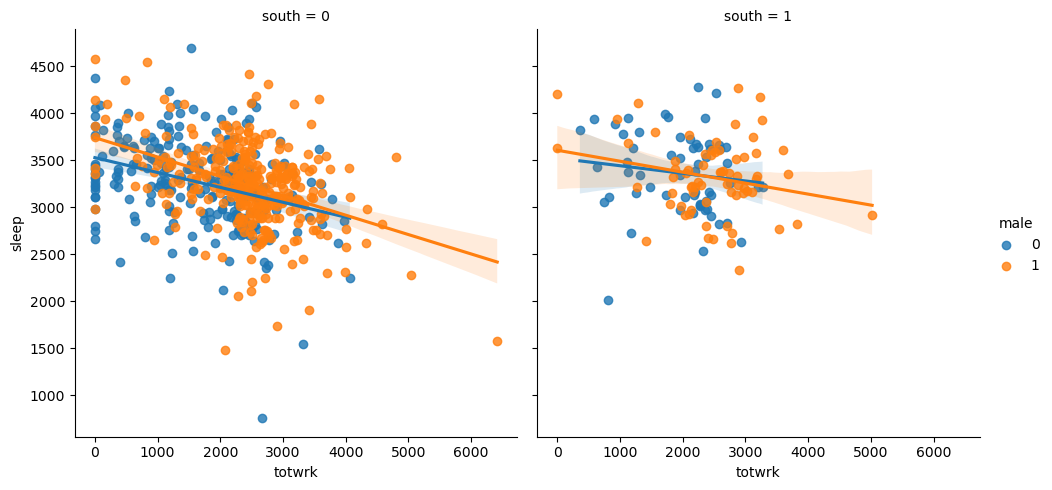

In [33]:
sns.lmplot(x='totwrk', y='sleep', data=df, hue='male', col='south')
plt.show(sns)

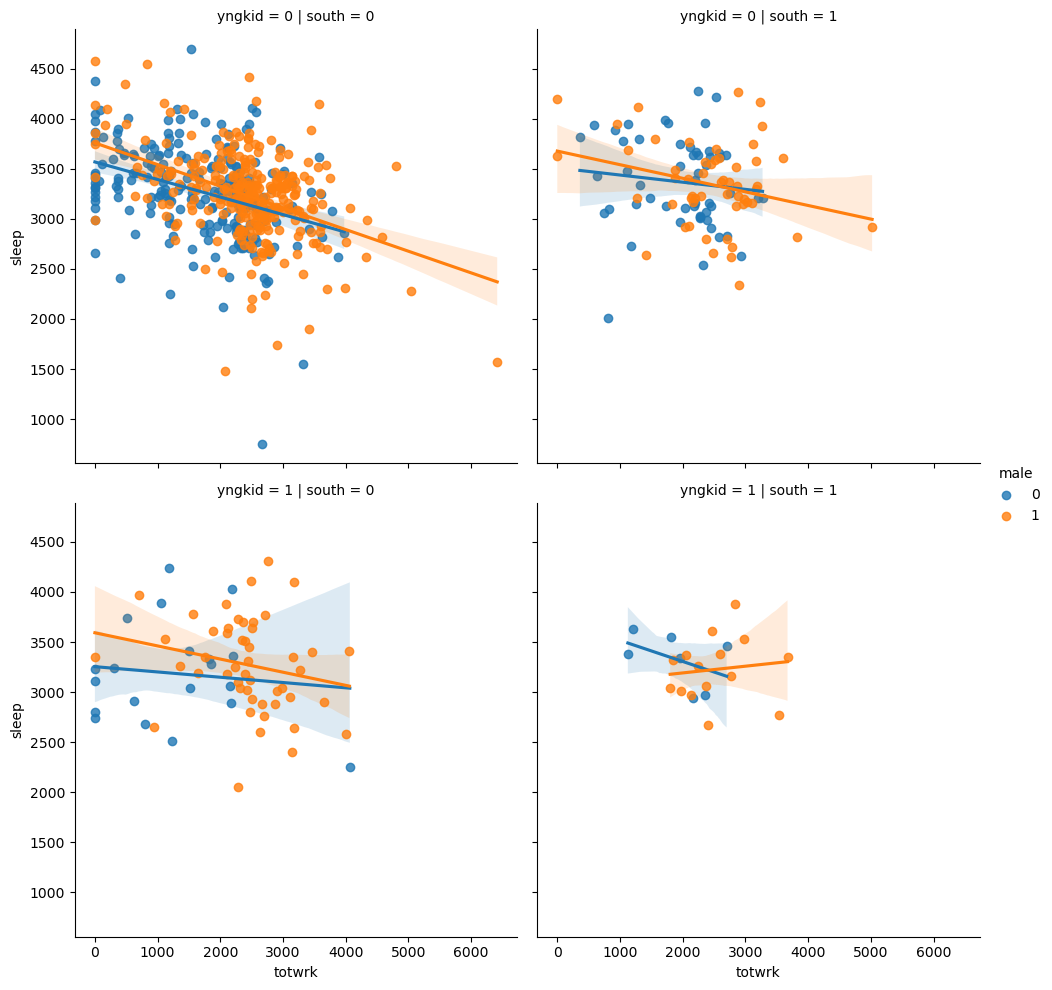

In [34]:
sns.lmplot(x='totwrk', y='sleep', data=df, hue='male', col='south', row='yngkid')
plt.show(sns)

## 1.2

$$H_0: \beta_{totwrk:male}=\beta_{male}=\beta_{age:male}=\beta_{smsa:male}=0$$
    $$H_1:  \beta_{totwrk:male}^2+\beta_{male}^2+\beta_{age:male}^2+\beta_{smsa:male}^2>0$$

In [7]:
data_string='''R2                      0.115          0.126   '''

In [11]:
re.findall(r'([-+]?\d+.\d+)', data_string)

['0.115', '0.126']

In [10]:
R_res, R_unres = np.float_(re.findall(r'([-+]?\d+.\d+)', data_string))

In [12]:
R_res

0.115

In [13]:
R_unres

0.126

In [16]:
F_obs= (R_unres-R_res)/(1-R_unres)*(len(df)-8)/4
F_obs.round(3)

2.196

In [17]:
alpha=0.05
stats.f.ppf(1-alpha,4, len(df)-8)

2.384692685857469

$$ F_{obs}<F_{cr}$$ $$Данные согласуются с гипотезой H_0$$

## 1.3

$$H_0: \beta_{totwrk:south}=\beta_{south}=\beta_{age:south}=\beta_{smsa:south}=0$$
    $$H_1:  \beta_{totwrk:south}^2+\beta_{south}^2+\beta_{age:south}^2+\beta_{smsa:south}^2>0$$

In [37]:
data_string='''R2                      0.115          0.131'''

In [38]:
re.findall(r'([-+]?\d+.\d+)', data_string)

['0.115', '0.131']

In [39]:
R_res, R_unres = np.float_(re.findall(r'([-+]?\d+.\d+)', data_string))

In [40]:
F_obs= (R_unres-R_res)/(1-R_unres)*(len(df)-8)/4
F_obs.round(3)

3.213

In [41]:
alpha=0.1
stats.f.ppf(1-alpha,4, len(df)-8)

1.9529296234091607

$$ F_{obs}>F_{cr}$$ $$Данные согласуются с гипотезой H_1$$

## 1.4

In [42]:
df = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/wage2.csv')
df

,wage,hours,IQ,KWW,educ,exper,tenure,age,married,black,south,urban,sibs,brthord,meduc,feduc,lwage
0,769,40,93,35,12,11,2,31,1,0,0,1,1,2.0,8.0,8.0,6.645091
1,808,50,119,41,18,11,16,37,1,0,0,1,1,NaN,14.0,14.0,6.694562
2,825,40,108,46,14,11,9,33,1,0,0,1,1,2.0,14.0,14.0,6.715384
3,650,40,96,32,12,13,7,32,1,0,0,1,4,3.0,12.0,12.0,6.476973
4,562,40,74,27,11,14,5,34,1,0,0,1,10,6.0,6.0,11.0,6.331502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,520,40,79,28,16,6,1,30,1,1,1,0,0,1.0,11.0,NaN,6.253829
931,1202,40,102,32,13,10,3,31,1,0,1,1,7,7.0,8.0,6.0,7.091742
932,538,45,77,22,12,12,10,28,1,1,1,0,9,NaN,7.0,NaN,6.287858
933,873,44,109,25,12,12,12,28,1,0,1,0,1,1.0,NaN,11.0,6.771935


$$H_0: \beta_{age:south}=\beta_{south}=\beta_{IQ:south}=\beta_{urban:south}=\beta_{married:south}=0$$
    $$H_1:  \beta_{age:south}^2+\beta_{south}^2+\beta_{IQ:south}^2+\beta_{urban:south}^2+\beta_{married:south}^2>0$$

In [43]:
data_string='''R2                      0.188          0.205   '''

In [44]:
re.findall(r'([-+]?\d+.\d+)', data_string)

['0.188', '0.205']

In [45]:
R_res, R_unres = np.float_(re.findall(r'([-+]?\d+.\d+)', data_string))

In [46]:
F_obs= (R_unres-R_res)/(1-R_unres)*(len(df)-10)/5
F_obs.round(3)

3.956

In [47]:
alpha=0.05
stats.f.ppf(1-alpha,5, len(df)-10)

2.223779986315624

$$ F_{obs}>F_{cr}$$ $$Данные согласуются с гипотезой H_1$$

## 1.5

$$H_0: \beta_{age:urban}=\beta_{urban}=\beta_{IQ:urban}=\beta_{south:urban}=0$$
    $$H_1:  \beta_{age:urban}^2+\beta_{urban}^2+\beta_{IQ:urban}^2+\beta_{south:urban}^2>0$$

In [48]:
data_string='''R2                      0.146          0.182    '''

In [49]:
re.findall(r'([-+]?\d+.\d+)', data_string)

['0.146', '0.182']

In [50]:
R_res, R_unres = np.float_(re.findall(r'([-+]?\d+.\d+)', data_string))

In [51]:
F_obs= (R_unres-R_res)/(1-R_unres)*(len(df)-8)/4
F_obs.round(3)

10.199

In [52]:
alpha=0.1
stats.f.ppf(1-alpha,4, len(df)-8)

1.9509328589732264

$$ F_{obs}>F_{cr}$$ $$Данные согласуются с гипотезой H_1$$

# 2.1

In [19]:
df = pd.read_csv('https://raw.githubusercontent.com/ryupepa/Econometrica/master/python-notebooks/data-csv/Diamond.csv')
df

,carat,colour,clarity,certification,price
0,0.30,D,VS2,GIA,1302
1,0.30,E,VS1,GIA,1510
2,0.30,G,VVS1,GIA,1510
3,0.30,G,VS1,GIA,1260
4,0.31,D,VS1,GIA,1641
...,...,...,...,...,...
303,1.01,I,VS1,HRD,8175
304,1.02,F,VVS2,HRD,10796
305,1.06,H,VVS2,HRD,9890
306,1.02,H,VS2,HRD,8959


In [20]:
df.loc[:,['carat','colour','certification','price']]

,carat,colour,certification,price
0,0.30,D,GIA,1302
1,0.30,E,GIA,1510
2,0.30,G,GIA,1510
3,0.30,G,GIA,1260
4,0.31,D,GIA,1641
...,...,...,...,...
303,1.01,I,HRD,8175
304,1.02,F,HRD,10796
305,1.06,H,HRD,9890
306,1.02,H,HRD,8959


In [18]:
df = pd.read_csv('https://raw.githubusercontent.com/ryupepa/Econometrica/master/python-notebooks/data-csv/Diamond.csv')
# Метод .loc[] фильтрует данные таблицы по строкам и столбцам.
# Метод  "df.loc[:,['carat']]" делает срез данных и означает,
# что из датафрейма выбираются все строки(это делается с помощью знака ":") столбца "carat".
df_all = pd.get_dummies(df.loc[:,['carat','colour','certification','price']])
df_all

,carat,price,colour_D,colour_E,colour_F,colour_G,colour_H,colour_I,certification_GIA,certification_HRD,certification_IGI
0,0.30,1302,1,0,0,0,0,0,1,0,0
1,0.30,1510,0,1,0,0,0,0,1,0,0
2,0.30,1510,0,0,0,1,0,0,1,0,0
3,0.30,1260,0,0,0,1,0,0,1,0,0
4,0.31,1641,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
303,1.01,8175,0,0,0,0,0,1,0,1,0
304,1.02,10796,0,0,1,0,0,0,0,1,0
305,1.06,9890,0,0,0,0,1,0,0,1,0
306,1.02,8959,0,0,0,0,1,0,0,1,0


$$H_0: \beta_{colour_E}=\beta_{colour_F}=\beta_{colour_G}=\beta_{colour_H}=\beta_{colour_I}=0$$
    $$H_1: \beta_{colour_E}^2+\beta_{colour_F}^2+\beta_{colour_G}^2+\beta_{colour_H}^2+\beta_{colour_I}^2>0$$

In [21]:
model_d = smf.ols(formula='np.log(price)~carat+I(carat**2)+colour_E+colour_F+colour_G+colour_H+colour_I+certification_HRD+certification_IGI',data=df_all).fit()
model_d.params

Intercept            5.866015
carat                5.667499
I(carat ** 2)       -2.153394
colour_E            -0.076348
colour_F            -0.152412
colour_G            -0.227155
colour_H            -0.313470
colour_I            -0.408190
certification_HRD    0.042463
certification_IGI    0.085451
dtype: float64

In [23]:
model_d.f_test('colour_E=colour_F=colour_G=colour_H=colour_I=0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=71.54686523424111, p=5.202465260133744e-49, df_denom=298, df_num=5>

In [24]:
alpha=0.01
stats.f.ppf(1-alpha,5,len(df_all)-5)

3.0781046281285778

$F_{cr}<F_{obs}$ нулевую гипотезу отвергаем

$$H_0: \beta_{certificationHRD}=\beta_{certificationIGI}=0$$
    $$H_1: \beta_{certificationHRD}^2+\beta_{certificationIGI}^2>0$$

In [53]:
model_d.f_test('certification_HRD=certification_IGI=0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=13.084620097370738, p=3.5745772535793977e-06, df_denom=298, df_num=2>

In [54]:
alpha=0.01
stats.f.ppf(1-alpha,2,len(df_all)-2)

4.675176656823765

$F_{cr}<F_{obs}$ нулевую гипотезу отвергаем

# 2.2

In [55]:
df = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/diamonds.csv')
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [56]:
df.loc[:,['carat','cut','color','x','y','z','price']]

,carat,cut,color,x,y,z,price
0,0.23,Ideal,E,3.95,3.98,2.43,326
1,0.21,Premium,E,3.89,3.84,2.31,326
2,0.23,Good,E,4.05,4.07,2.31,327
3,0.29,Premium,I,4.20,4.23,2.63,334
4,0.31,Good,J,4.34,4.35,2.75,335
...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,5.75,5.76,3.50,2757
53936,0.72,Good,D,5.69,5.75,3.61,2757
53937,0.70,Very Good,D,5.66,5.68,3.56,2757
53938,0.86,Premium,H,6.15,6.12,3.74,2757


In [57]:
df_all = pd.get_dummies(df.loc[:,['carat','cut','color','x','y','z','price']])
df_all

,carat,x,y,z,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,3.95,3.98,2.43,326,0,0,1,0,0,0,1,0,0,0,0,0
1,0.21,3.89,3.84,2.31,326,0,0,0,1,0,0,1,0,0,0,0,0
2,0.23,4.05,4.07,2.31,327,0,1,0,0,0,0,1,0,0,0,0,0
3,0.29,4.20,4.23,2.63,334,0,0,0,1,0,0,0,0,0,0,1,0
4,0.31,4.34,4.35,2.75,335,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,5.75,5.76,3.50,2757,0,0,1,0,0,1,0,0,0,0,0,0
53936,0.72,5.69,5.75,3.61,2757,0,1,0,0,0,1,0,0,0,0,0,0
53937,0.70,5.66,5.68,3.56,2757,0,0,0,0,1,1,0,0,0,0,0,0
53938,0.86,6.15,6.12,3.74,2757,0,0,0,1,0,0,0,0,0,1,0,0


In [64]:
df_all.rename(columns={'cut_Very Good':'cut_VeryGood'}, inplace=True)
df_all

,carat,x,y,z,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_VeryGood,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,3.95,3.98,2.43,326,0,0,1,0,0,0,1,0,0,0,0,0
1,0.21,3.89,3.84,2.31,326,0,0,0,1,0,0,1,0,0,0,0,0
2,0.23,4.05,4.07,2.31,327,0,1,0,0,0,0,1,0,0,0,0,0
3,0.29,4.20,4.23,2.63,334,0,0,0,1,0,0,0,0,0,0,1,0
4,0.31,4.34,4.35,2.75,335,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,5.75,5.76,3.50,2757,0,0,1,0,0,1,0,0,0,0,0,0
53936,0.72,5.69,5.75,3.61,2757,0,1,0,0,0,1,0,0,0,0,0,0
53937,0.70,5.66,5.68,3.56,2757,0,0,0,0,1,1,0,0,0,0,0,0
53938,0.86,6.15,6.12,3.74,2757,0,0,0,1,0,0,0,0,0,1,0,0


$$H_0: \beta_{color_E}=\beta_{color_F}=\beta_{color_G}=\beta_{color_H}=\beta_{color_I}=\beta_{color_J}=0$$
    $$H_1: \beta_{color_E}^2+\beta_{color_F}^2+\beta_{color_G}^2+\beta_{color_H}^2+\beta_{color_I}^2+\beta_{color_J}^2>0$$

In [65]:
model_d = smf.ols(formula='np.log(price)~carat+I(carat**2)+color_E+color_F+color_G+color_H+color_I+color_J+cut_Good+cut_Ideal+cut_Premium+cut_VeryGood+x+y+z',data=df_all).fit()
model_d.params

Intercept        3.991634
carat            2.535459
I(carat ** 2)   -0.645788
color_E         -0.030235
color_F         -0.039489
color_G         -0.071381
color_H         -0.210150
color_I         -0.307512
color_J         -0.432402
cut_Good         0.118383
cut_Ideal        0.250758
cut_Premium      0.161182
cut_VeryGood     0.177357
x                0.338985
y                0.014541
z                0.063132
dtype: float64

In [67]:
model_d.f_test('color_E=color_F=color_G=color_H=color_I=color_J=0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=2282.370147785114, p=0.0, df_denom=5.39e+04, df_num=6>

In [68]:
alpha=0.05
stats.f.ppf(1-alpha,6,len(df_all)-6)

2.0987650315976247

$F_{cr}<F_{obs}$ нулевую гипотезу отвергаем

$$H_0: \beta_{cutGood}=\beta_{cutVeryGood}=\beta_{cutIdeal}=\beta_{cutPremium}=0$$
    $$H_1: \beta_{cutGood}^2+\beta_{cutVeryGood}^2+\beta_{cutIdeal}^2+\beta_{cutPremium}^2>0$$

In [69]:
model_d.f_test('cut_Good=cut_VeryGood=cut_Ideal=cut_Premium=0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=797.0664644236263, p=0.0, df_denom=5.39e+04, df_num=4>

In [70]:
alpha=0.05
stats.f.ppf(1-alpha,4,len(df_all)-4)

2.3720969087191244

$F_{cr}<F_{obs}$ нулевую гипотезу отвергаем